# Assignment 7: Security assessment of electrical power systems
This practicum session is mainly related to the course reader for lecture 7. Python will be used to construct the machine learning model and perform the power system security analysis. Sckitlearn library will be used as well. Scikitlearn is a machine learning Python library that provides efficient models for both supervised and unsupervised learning methods. Follow the next link for the installation instructions: https://scikit-learn.org/stable/install.html

In the following tasks, a decision tree model will be trained to assess the security of Maasvlakte transmission network.

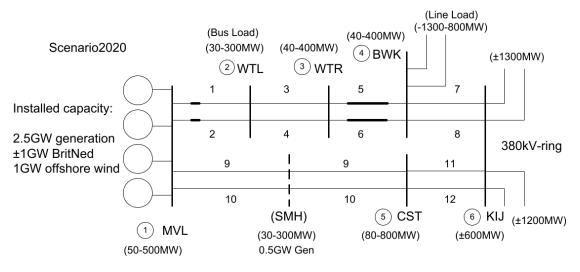

During Practicum 5, the Maasvlakte (MVL) network was analyzed. During normal contingencies, it was found that the the most loaded lines operated below 35\% of its nominal capacity. However, the fast electrification of the industry and transport sectors lead to a spike in the electricity demand on that region. System operators are interested to study the reliability of their future grid to decide on possible investments in the infrastructure.  For simplicity, we will assume that in a 2040 scenario the load in every line will increase by a factor of 3, while the network infrastructure remains unchanged.

# Importing Useful Libraries

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, accuracy_score, recall_score, precision_score

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as clrs
from sklearn.utils import resample

# Question 1: New scenario modelling (1 point) - loading dataset files

Using the provided python file, find the new maximum relative line load. At what hour of the year does it occur?

In [ ]:
# Load the feature set
df_X_dataset = pd.read_csv('scenario2020_MVL.csv')  # these are the generation and load (in MW) per substation
X_dataset = df_X_dataset.to_numpy()
X_index = df_X_dataset.keys()

In [ ]:
# load the label set
df_Y_dataset = pd.read_csv('line_loading_normal.csv')
# In practicum 5, we know that in normal condition, line 1 & 2 are loaded the most. So in this practicum, we study the behavior of line 1
Y_dataset = df_Y_dataset.to_numpy()[:,1]*3

In [ ]:
#Write here your code for question 1


# Question 2: Database pre-processing - creating system security labels (2 points)

The Transmission System Operator (TSO) has set the line loading operational limit to be 70%. Therefore, lines operating above that threshold will be considered as insecure, while those above 100% are on unstable region. Implement a script to label the operating conditions in terms of its security level. From the training data, how many operation points represent an insecure condition (answer in %)? How many hours does the system operates in the insecure region (answer in hours)?

In [ ]:
#Input data-set pre-processing
X_train, X_test, y_train, y_test = train_test_split(X_dataset, Y_dataset, test_size=0.3, random_state=3065, shuffle=True)        

# creating the classification labels
#Place here your code for Question 2
limit =
y_train_class = []
y_test_class = []

# Question 3: Training and testing dataset (1 point)

Within the provided script, the following code line is included:

X_train, X_test, y_train, y_test = train_test_split(X_dataset, Y_dataset, test_size=0.3, random_state=3065, shuffle=True)

Describe what the function does, and why we need the variables X_train, X_test, y_train, y_test. You can use Scikit learn package available documentation (you can use the following link: https://scikit-learn.org/stable/index.html and use the search bar to find the aforementioned function)

In [ ]:
# Creating and training the Decision Tree
DT = DecisionTreeClassifier(random_state=3065)
DT.fit(X_train, y_train_class)

# Question 4: Assess the performance of ML model with the Confusion matrix (2 points)
## Q4.1: Performance assessment on the training set

In [ ]:
# Scattered plot function of both the actual classes and the predicted classes
def plot_classification_prediction(y_real, y_pred_class, y_real_class, title):
    y_real_index = range(len(y_real))
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(30, 5))
    axes[0].scatter(y_real_index, y_real, c=y_pred_class, cmap=clrs.ListedColormap(['blue', 'red']))
    axes[1].scatter(y_real_index, y_real, c=y_real_class, cmap=clrs.ListedColormap(['blue', 'red']))
    axes[0].set_xlabel('datapoints')
    axes[0].set_ylabel('line loading')
    axes[1].set_xlabel('datapoints')
    axes[1].set_ylabel('line loading')
    axes[0].title.set_text('Predicted Classes')
    axes[1].title.set_text('Actual Classes')
    fig.suptitle(title, fontsize=16)
    plt.show()

In [ ]:
# Performance metrics of the Decision tree - training data-set
# Predicting the output label for the training data-set
print('--- Training set ---')
y_pred_train_class = DT.predict(X_train)

# Place here your code for Question 4


Scikit learn has an already function built to create the confusion matrix. Check the documentation in the following link: https://scikit-learn.org/stable/index.html and use the search bar to find the aforementioned function.

In [ ]:
# The following function can be used to create the Confusion Matrix. You can check 
ConfusionMatrixDisplay.from_predictions(y_train_class, y_pred_train_class)

In [ ]:
# Place here your code to create the plots for Question 4 - training data-set


## Q4.2: Performance assessment on the testing set

In [ ]:
# Performance metrics of the Decision tree - testing data-set
print('--- Testing set ---')
# Place here your code for Question 4


In [ ]:
# Create the Confusion Matrix for the testing data-set (Question 4)


In [ ]:
# Place here your code to create the plots for Question 4 - testing data-set


# Question 5: Risk of applying ML models (1 point)

From the TSO point of view, a false alarm (False Positive -FP-) does not have the same impact as an insecure operation that was not predicted (False Negative -FN-). Lets assume that the impact of a FP is 100 $EUR/FP$, while for FN is 1000000 $EUR/FN$. What is the risk of applying this DT model? What is the contribution of FP to that risk (answer in %)?

In [ ]:
#Place here your code for Question 5


# Question 6: Sensitivity of the insecurity-threshold (1 point)

The regulatory introduces very high penalty costs for a loss of loads and requires the TSOs to operate with a high security of energy supply. As a result, the TSO operates more conservatively the grid. The new operational limit for the lines should be set to be 50% for each line.

Re-do questions 3 to 5 with the new operational limit. What are the consequences of lowering the threshold? How does the change impact affect the DT performance? Base your answer on the performance metrics as well as in the risk of applying the new model.

In [ ]:
#Place here your code for Question 6
#Create the training and testing data-sets


In [ ]:
#Create the decision tree

#The following sections should include the decision tree assessment for both the training and testing data-sets
#Predict the output labels and assess the performance metrics

#Create the confusion matrix

#Create the scattered plots

# Risk assessment

# Question 7: Dealing imbalanced dataset (2 points)

Aiming to improve the model performance, the TSO suggests to implement either a down-sampling, up-sampling or over-weighting approach. Implement one of the three techniques and analyze the results. Explain the benefits and drawbacks of the selected approach, including a comparison to the base case. Use the original threshold of 70%.

A hint on how to implement each approach as follows:

Option A - Up-sampling: As in the provided data-set the insecure are a much less-populated data points, one could create artificial data point when sampling real information is not feasible. You can use existing insecure data-points to create new artificial information to be used as input data for the training set.
    
Option B - Down-sampling: Another approach would be to decrease the over-populated data points. Therefore, one could delete some of the secure data points so the population of each class can be balanced.

Option C - Over-weighting: Check \textit{DecisionTreeClassifier} parameters in the Scikit learn website (https://scikit-learn.org/stable/index.html). The overall idea is make insecure points have a higher class weight over the secure points.

In [ ]:
#Place your code for Question 7 here
#Remember to re-label the input data using 70% as threshold (above 70% of line loading will be considered as insecure)
